Comparing own implementation of KNN with sklearn

In [54]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sklearn 

iris = sklearn.datasets.load_iris()

print(iris.DESCR)
#print(iris.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5

Creating dataframe from bunch

In [23]:
dframe = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=np.concatenate([iris['feature_names'], ['target']]))

target
0.0    50
1.0    50
2.0    50
dtype: int64
['setosa' 'versicolor' 'virginica']


Investigating data

target
0.0    50
1.0    50
2.0    50
dtype: int64
['setosa' 'versicolor' 'virginica']


C:\Users\mtarc\AppData\Local\Temp\ipykernel_35096\1976537272.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


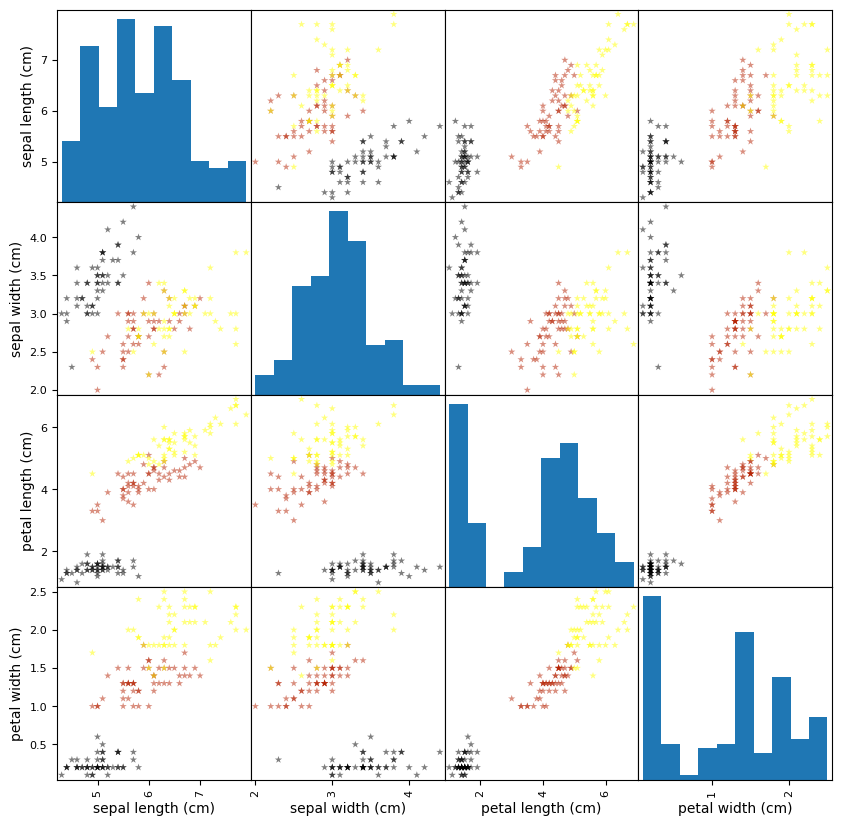

In [40]:
target = dframe.groupby('target').size()
print(target)
print(iris.target_names)

import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split

X = dframe[iris.feature_names]
y = dframe['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, marker = '*', s=30, figsize=(10,10), cmap=cmap)

Traning with sklearn KNeighborsClassifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors = 1)

def calculate_sklearn_knn_score(X_train, X_test, y_train, y_test):
    sklearn_knn.fit(X_train, y_train)
    sklearn_knn.predict(X_test)
    sklearn_knn_score = sklearn_knn.score(X_test, y_test)

    return sklearn_knn_score

calculate_sklearn_knn_score(X_train, X_test, y_train, y_test)

0.9736842105263158

With own knn implementation

In [101]:
%aimport KNN

from KNN import KNN
my_knn = KNN(k = 1)

def calculate_my_knn_score(X_train, X_test, y_train, y_test):
    my_knn.fit(X_train, y_train)
    my_knn_score = my_knn.score(X_test, y_test)

    return my_knn_score

calculate_my_knn_score(X_train, X_test, y_train, y_test)

0.9736842105263158

Compare results

In [102]:
sklearn_knn_score = calculate_sklearn_knn_score(X_train, X_test, y_train, y_test)
my_knn_score = calculate_my_knn_score(X_train, X_test, y_train, y_test)
assert(sklearn_knn_score == my_knn_score)

Compare performance

In [103]:
%timeit -n 100 calculate_sklearn_knn_score(X_train, X_test, y_train, y_test)
%timeit -n 100 calculate_my_knn_score(X_train, X_test, y_train, y_test)

14.1 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.6 ms ± 5.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Congratulations to myself, my implementation of KNN is x3 slower comparing to sklearn one
todo: check how they improve perf
todo: check how to plot decision boundaries